In [1]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
using KernelDensity
include("../Inversion/Plot.jl")
include("../Inversion/DF_GMVI.jl")
include("./Square-Map.jl")

Gaussian_mixture_VI (generic function with 1 method)

# 1-Parameter Square Map
The posterior distribution is studied  numerically on the following nonlinear 1-parameter problem:

$$
\begin{equation*}
y = \mathcal{G}(\theta) + \eta \qquad \mathcal{G}(\theta) = \theta^2. 
\end{equation*}
$$    


We assume the observation is $y = 1$ and the piror is $\mathcal{N}(3, 2^2)$, we consider the following cases

$$
\begin{align*}
&A: \eta \sim \mathcal{N}(0, 0.2^2)\\
&B: \eta \sim \mathcal{N}(0, 0.5^2)\\
&C: \eta \sim \mathcal{N}(0, 1^2)\\
&D: \eta \sim \mathcal{N}(0, 1.5^2)\\
\end{align*}
$$ 

[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("iter = ", 160, " / ", 200)
[ Info: ("iter = ", 180, " / ", 200)
[ Info: ("iter = ", 200, " / ", 200)
[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("iter = ", 160, " / ", 200)
[ Info: ("iter = ", 180, " / ", 200)
[ Info: ("iter = ", 200, " / ", 200)
[ Info: ("iter = ", 20, " / ", 200)
[ Info: ("iter = ", 40, " / ", 200)
[ Info: ("iter = ", 60, " / ", 200)
[ Info: ("iter = ", 80, " / ", 200)
[ Info: ("iter = ", 100, " / ", 200)
[ Info: ("iter = ", 120, " / ", 200)
[ Info: ("iter = ", 140, " / ", 200)
[ Info: ("ite

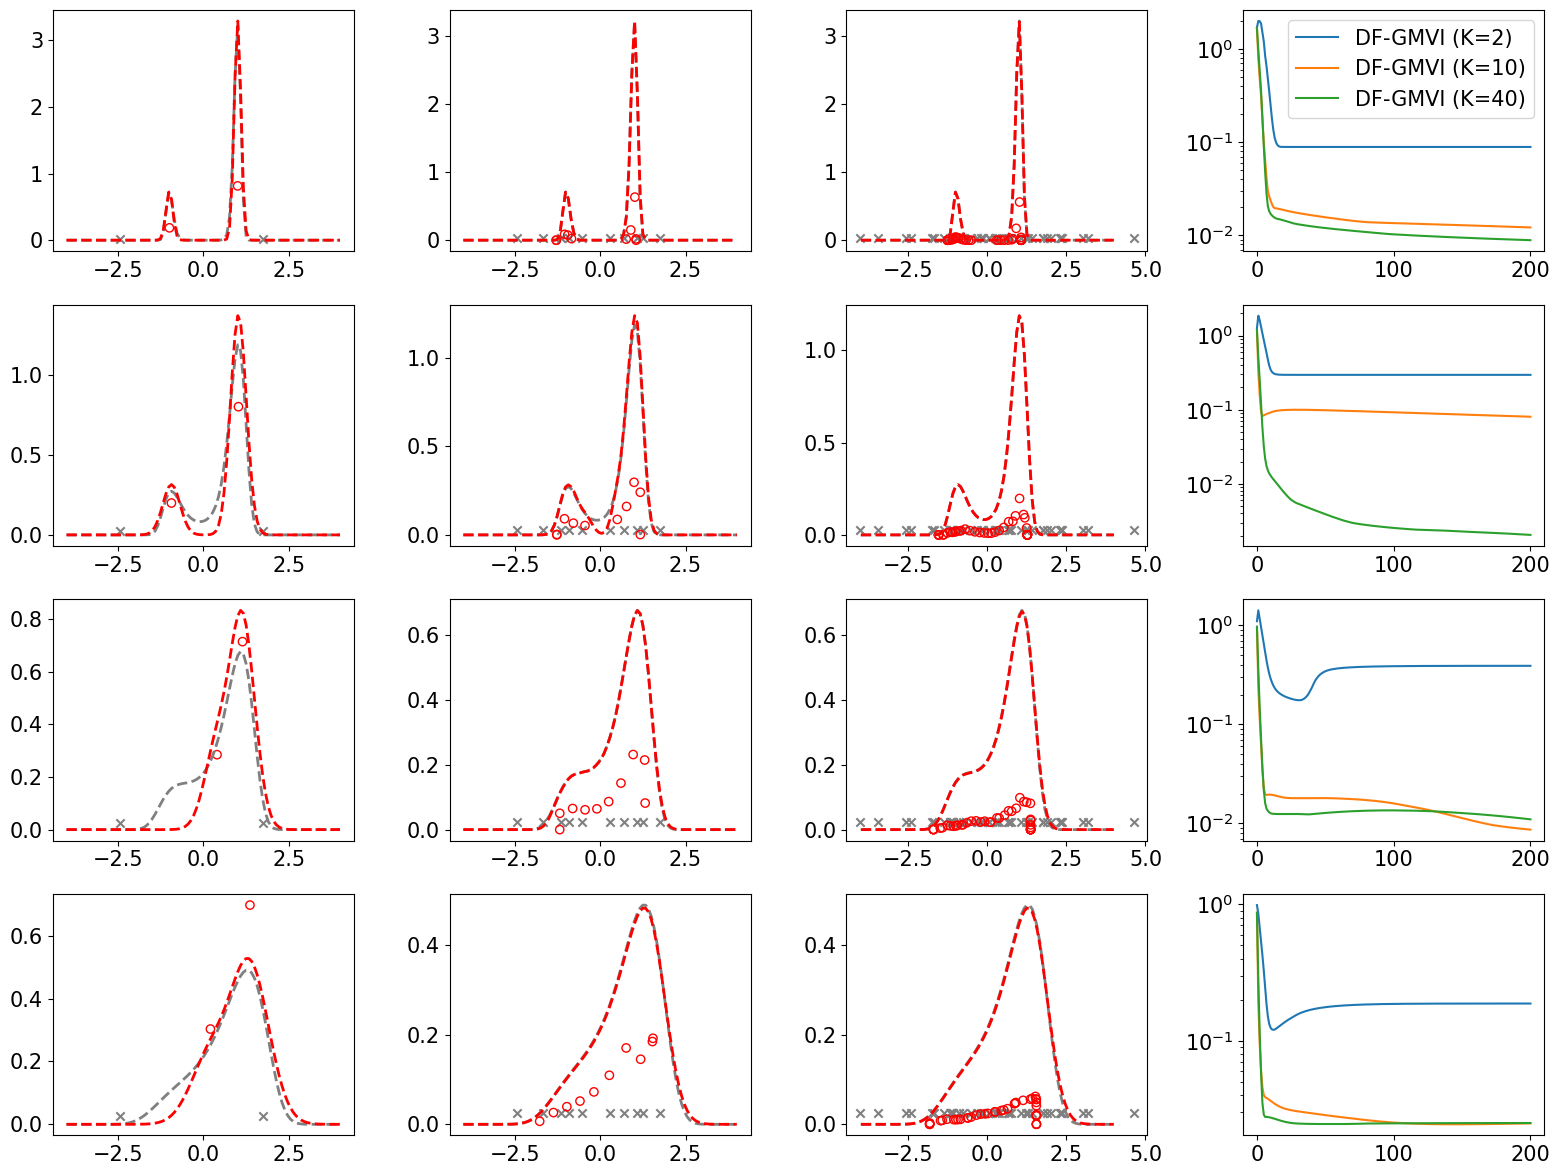

In [2]:
N_modes_array = [2; 10; 40]
fig, ax = PyPlot.subplots(nrows=4, ncols=length(N_modes_array)+1, sharex=false, sharey=false, figsize=(16,12))

    
Random.seed!(111);
N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, σ0 = 3.0, 2.0
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(Normal(0, σ0))
    xx0_cov[im, :, :] .= σ0^2
end

N_iter = 200
Nx = 100
y = [1.0; 3.0]
quadrature_type_GM = "mean_point"
N_ens_GM = -1


ση = [0.2; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
dt = 5e-1

objs = [Gaussian_mixture_VI(nothing, func_F, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]

  
visualization_1d(ax[1,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs, label="DF-GMVI")


ση = [0.5; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
dt = 5e-1
objs = [Gaussian_mixture_VI(nothing, func_F, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[2,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs, label=nothing)


ση = [1.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
dt = 5e-1
objs = [Gaussian_mixture_VI(nothing, func_F, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[3,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs, label=nothing)



ση = [2.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
dt = 5e-1
objs = [Gaussian_mixture_VI(nothing, func_F, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[4,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs, label=nothing)

fig.tight_layout()
fig.savefig("DF-GMVI-1D-bimodal.pdf")